# Making publication-quality plots with Sherpa

So Sherpa uses [matplotlib](https://matplotlib.org/) to display its plots, so you may be able to tweak a plot.

If this is not enough then we do have routines that return the data used to create most plots.

If this is not enough then there are ways to evaluate the models directly to get the data you need.

In order to get some "interesting" plots I am going to use the final fit to the `X-ray analysis with backgrounds and adding your own response` notebook, so I'll skip the explanations.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sherpa.astro.ui import *

Now, Sherpa routines are by default quite chatty, telling us things like "Oh, I've automatically loaded in your ARF and RMF as well ass the PHA file" or "hey, these are the fit results", but this can be tiring to wade through. So we are going to temporarily "turn off" the logging for the next few cells (if you are reading this after CIAO 4.14 has come out you can use the [sherpa.utils.logging.SherpaVerbosity](https://sherpa.readthedocs.io/en/latest/overview/api/sherpa.utils.logging.SherpaVerbosity.html) context manager to do this).

In [2]:
import logging

logging.getLogger('sherpa').setLevel('ERROR')

In [3]:
load_data('data/acisf04938_000N002_r0043_pha3.fits')
rmf_final = unpack_rmf('data/acisf04938_000N002_r0043_rmf3.fits')

notice_id(1, 0.5, 7)
group_counts(20, tabStops=~get_data(1).get_mask())

bkg_model = powlaw1d.bpl1_1 + powlaw1d.bpl2_1 + xsgaussian.bline1_1

bline1_1.linee = 2
set_par(bline1_1.sigma, 0.01, frozen=True)
set_bkg_full_model(rmf_final(bkg_model))

fit_bkg()

In [4]:
bscale = get_bkg_scale()
src_model = xsphabs.gal_1 * powlaw1d.pl_1
srsp = get_response()
set_full_model(srsp(src_model) + bscale * rmf_final(bkg_model))

fit()

In [5]:
logging.getLogger('sherpa').setLevel('INFO')

# Adjusting a plot

Let's look at adjusting an existing plot first. Here we can see that the title of the second plot overlaps the X-axis label of the first, and we may want to change the relative sizes.

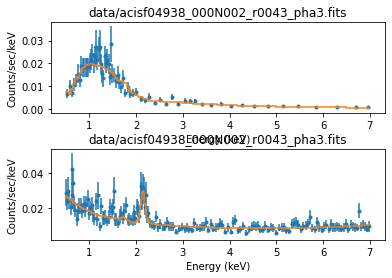

In [6]:
plot('fit', 'bkgfit')

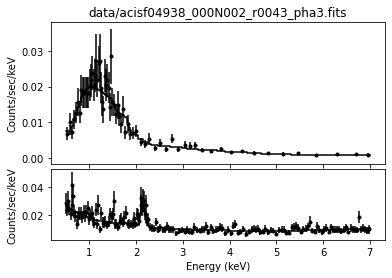

In [7]:
plot('fit', 'bkgfit')

fig = plt.gcf()
axes = fig.axes

# Hide the X-axis labels between the plots
axes[0].set_xlabel('')
axes[1].set_title('')

# reduce the gap between the two plots
plt.subplots_adjust(hspace=0.05)

# Make the top plot taller than the bottom
#
# I'm sure there are easier ways to do this but fighting the matplotlib documentation
# is more than I can cope with today.
#
axes[0].get_gridspec().set_height_ratios([2, 1])
axes[1].get_gridspec().set_height_ratios([2, 1])

axes[0].get_gridspec().update()
axes[1].get_gridspec().update()

# Change the colors, which unfortunately requires understanding how matplotlib
# stores the objects
#
for ax in axes:
    for l in ax.lines:
        l.set_color('k')
        
    for c in ax.collections:
        c.set_color('k')

# Re-creating the plot

Each `plot_xxx` command has a corresponing `get_xxx_plot` command which returns the data used to create the plot.

In [8]:
pdata = get_data_plot()
mdata = get_model_plot()
fdata = get_fit_plot()

The `pdata` and `mdata` objects contain the "data" and "model" plots, whereas `fdata` contains both:

In [9]:
print(pdata)

xlo    = [0.4964,0.5548,0.5986,0.657 ,0.7008,0.7446,0.7738,0.8176,0.8468,0.876 ,
 0.9052,0.9344,0.9636,0.9928,1.022 ,1.0512,1.0804,1.1096,1.1388,1.1534,
 1.1826,1.2118,1.2264,1.2556,1.2848,1.314 ,1.3432,1.3724,1.4016,1.4308,
 1.46  ,1.4746,1.5038,1.5476,1.5914,1.6206,1.6644,1.7082,1.7374,1.7958,
 1.8396,1.898 ,1.971 ,2.044 ,2.1462,2.2484,2.3214,2.4674,2.5696,2.7302,
 2.8178,2.9784,3.0952,3.212 ,3.3288,3.504 ,3.723 ,3.8982,4.161 ,4.38  ,
 4.672 ,4.9932,5.3144,5.6064,6.0882,6.497 ,6.9058]
xhi    = [0.5548,0.5986,0.657 ,0.7008,0.7446,0.7738,0.8176,0.8468,0.876 ,0.9052,
 0.9344,0.9636,0.9928,1.022 ,1.0512,1.0804,1.1096,1.1388,1.1534,1.1826,
 1.2118,1.2264,1.2556,1.2848,1.314 ,1.3432,1.3724,1.4016,1.4308,1.46  ,
 1.4746,1.5038,1.5476,1.5914,1.6206,1.6644,1.7082,1.7374,1.7958,1.8396,
 1.898 ,1.971 ,2.044 ,2.1462,2.2484,2.3214,2.4674,2.5696,2.7302,2.8178,
 2.9784,3.0952,3.212 ,3.3288,3.504 ,3.723 ,3.8982,4.161 ,4.38  ,4.672 ,
 4.9932,5.3144,5.6064,6.0882,6.497 ,6.9058,7.008 ]
y      = [0.0068

In [10]:
print(mdata)

xlo    = [0.4964,0.511 ,0.5256,0.5402,0.5548,0.5694,0.584 ,0.5986,0.6132,0.6278,
 0.6424,0.657 ,0.6716,0.6862,0.7008,0.7154,0.73  ,0.7446,0.7592,0.7738,
 0.7884,0.803 ,0.8176,0.8322,0.8468,0.8614,0.876 ,0.8906,0.9052,0.9198,
 0.9344,0.949 ,0.9636,0.9782,0.9928,1.0074,1.022 ,1.0366,1.0512,1.0658,
 1.0804,1.095 ,1.1096,1.1242,1.1388,1.1534,1.168 ,1.1826,1.1972,1.2118,
 1.2264,1.241 ,1.2556,1.2702,1.2848,1.2994,1.314 ,1.3286,1.3432,1.3578,
 1.3724,1.387 ,1.4016,1.4162,1.4308,1.4454,1.46  ,1.4746,1.4892,1.5038,
 1.5184,1.533 ,1.5476,1.5622,1.5768,1.5914,1.606 ,1.6206,1.6352,1.6498,
 1.6644,1.679 ,1.6936,1.7082,1.7228,1.7374,1.752 ,1.7666,1.7812,1.7958,
 1.8104,1.825 ,1.8396,1.8542,1.8688,1.8834,1.898 ,1.9126,1.9272,1.9418,
 1.9564,1.971 ,1.9856,2.0002,2.0148,2.0294,2.044 ,2.0586,2.0732,2.0878,
 2.1024,2.117 ,2.1316,2.1462,2.1608,2.1754,2.19  ,2.2046,2.2192,2.2338,
 2.2484,2.263 ,2.2776,2.2922,2.3068,2.3214,2.336 ,2.3506,2.3652,2.3798,
 2.3944,2.409 ,2.4236,2.4382,2.4528,2.4674,2.482 ,2.496

In [11]:
print(fdata)

dataplot   = data/acisf04938_000N002_r0043_pha3.fits
xlo    = [0.4964,0.5548,0.5986,0.657 ,0.7008,0.7446,0.7738,0.8176,0.8468,0.876 ,
 0.9052,0.9344,0.9636,0.9928,1.022 ,1.0512,1.0804,1.1096,1.1388,1.1534,
 1.1826,1.2118,1.2264,1.2556,1.2848,1.314 ,1.3432,1.3724,1.4016,1.4308,
 1.46  ,1.4746,1.5038,1.5476,1.5914,1.6206,1.6644,1.7082,1.7374,1.7958,
 1.8396,1.898 ,1.971 ,2.044 ,2.1462,2.2484,2.3214,2.4674,2.5696,2.7302,
 2.8178,2.9784,3.0952,3.212 ,3.3288,3.504 ,3.723 ,3.8982,4.161 ,4.38  ,
 4.672 ,4.9932,5.3144,5.6064,6.0882,6.497 ,6.9058]
xhi    = [0.5548,0.5986,0.657 ,0.7008,0.7446,0.7738,0.8176,0.8468,0.876 ,0.9052,
 0.9344,0.9636,0.9928,1.022 ,1.0512,1.0804,1.1096,1.1388,1.1534,1.1826,
 1.2118,1.2264,1.2556,1.2848,1.314 ,1.3432,1.3724,1.4016,1.4308,1.46  ,
 1.4746,1.5038,1.5476,1.5914,1.6206,1.6644,1.7082,1.7374,1.7958,1.8396,
 1.898 ,1.971 ,2.044 ,2.1462,2.2484,2.3214,2.4674,2.5696,2.7302,2.8178,
 2.9784,3.0952,3.212 ,3.3288,3.504 ,3.723 ,3.8982,4.161 ,4.38  ,4.672 ,
 4.9932,5.3144

Let's use this to recreate `plot_fit`:

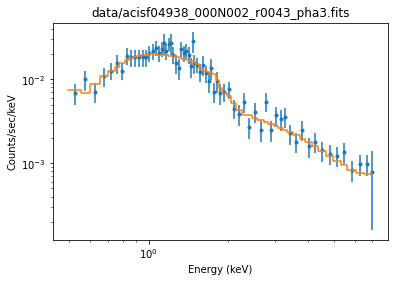

In [12]:
plot_fit(xlog=True, ylog=True)

We can almost get it using [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html#matplotlib.pyplot.errorbar) to plot the data (`pdata`) and [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) but there are two differences with the model data

* the model has a lot more points in our version that the `plot_fit` call, which is because `plot_fit` displays the grouped model but `plot_model`/`get_model_plot` shows the un-grouped data
* the `plot_fit` call plots a "histogram" (i.e. a horizontal line across each bin then a vertical line to the next bin) but `plot` connects the center of each bin

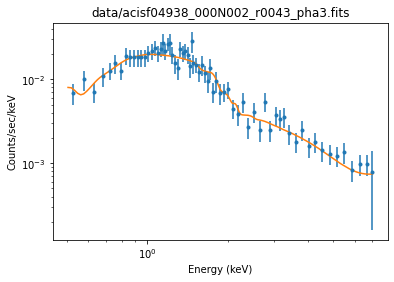

In [13]:
plt.errorbar(pdata.x, pdata.y, pdata.yerr, fmt='.')
plt.plot(mdata.x, mdata.y, '-')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(pdata.xlabel)
plt.ylabel(pdata.ylabel)
plt.title(pdata.title);

We can address the first point by using the data from `get_fit_plot` instead of `get_model_plot`:

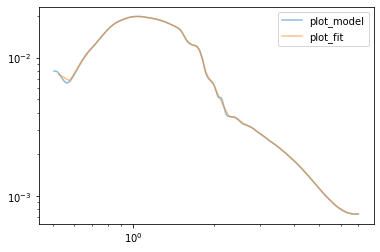

In [14]:
plt.plot(mdata.x, mdata.y, '-', label='plot_model', alpha=0.5)
plt.plot(fdata.modelplot.x, fdata.modelplot.y, '-', label='plot_fit', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend();

For the second point, we can take advantage of the `xlo` and `xhi` attributes in the plot-data objects (note that this only holds for "nitegrated" data sets like PHA files; for a generic 1D `(x,y)` dataset we would only have the `x` attribute).

Unfortunately I haven't found a nice way to plot a histogram in matplotlib (the existing options don't quite match my needs) so we have to do it manually: 

In [15]:
def hplot(data, *args, **kwargs):
    x = np.vstack((data.xlo, data.xhi)).T.flatten()
    y = np.vstack((data.y, data.y)).T.flatten()
    plt.plot(x, y, *args, **kwargs)

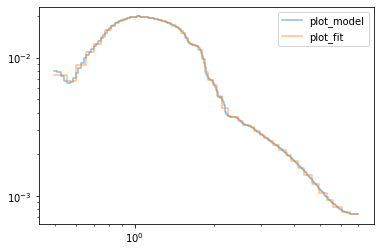

In [16]:
hplot(mdata, '-', label='plot_model', alpha=0.5)
hplot(fdata.modelplot, '-', label='plot_fit', alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend();

Putting this together:

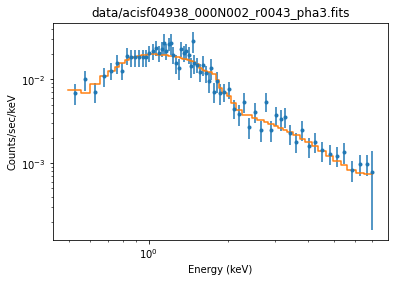

In [17]:
plt.errorbar(pdata.x, pdata.y, pdata.yerr, fmt='.')
hplot(fdata.modelplot, '-')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(pdata.xlabel)
plt.ylabel(pdata.ylabel)
plt.title(pdata.title);

# Looking at features of the data

The [plot_source_component](https://cxc.cfa.harvard.edu/sherpa/ahelp/plot_source_component.html) and [plot_model_component](https://cxc.cfa.harvard.edu/sherpa/ahelp/plot_model_component.html) commands can be helpful to isolate a sub-set of the models (or overlay a separate model).

In this case we show the contribution from just the line model and from a manually-created top-hat model (which is only set over the 2.1 to 2.2 keV range which I've manually adjusted to be close to the line model).

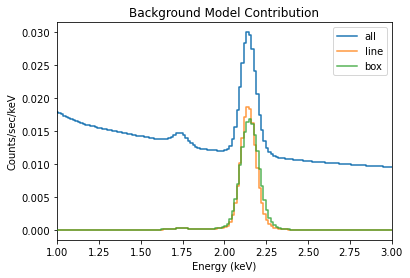

In [18]:
plot_bkg_model()

plot_model_component(rmf_final(bline1_1), alpha=0.8, overplot=True)

create_model_component('box1d', 'box')
box.xlow = 2.1
box.xhi = 2.2

plot_model_component(rmf_final(1.25e3 * box), alpha=0.8, overplot=True)

plt.xlim(1, 3)

plt.legend(['all', 'line', 'box']);

We can query this data to generate our own version of the plot:

In [19]:
cplot = get_model_component_plot(id=1, model=rmf_final(bline1_1))

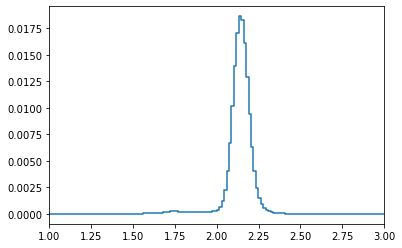

In [20]:
hplot(cplot)
plt.xlim(1, 3);

# A summary

So, now we now how to extract the data from the `get_xxx_plot` calls we can generate the plots we care about (perhaps with a different visualization tool than `matplotlib`!).

# Doing it manually - data

The [get_data](https://cxc.cfa.harvard.edu/sherpa/ahelp/get_data.html) call returns a data object that can be used to access the data values. The exact methods depend on the data type (PHA objects have a lot more things you can ask), but there are some commonalities:

In [21]:
pha = get_data()

In [22]:
print(pha)

name           = data/acisf04938_000N002_r0043_pha3.fits
channel        = Float64[1024]
counts         = Float64[1024]
staterror      = None
syserror       = None
bin_lo         = None
bin_hi         = None
grouping       = Float64[1024]
quality        = Float64[1024]
exposure       = 50454.152030948
backscal       = 0.00045574530448285
areascal       = 1.0
grouped        = True
subtracted     = False
units          = energy
rate           = True
plot_fac       = 0
response_ids   = [1]
background_ids = [1]


We can return the independent (i.e. X) and dependent (i.e. Y) values, normally with the current filter applied (it gets more complicated with PHA data as you have to worry about whether to apply the grouping column and the "native" units are channels but it's more interesting to plot up energy or wavelengths). Unfortunately this API is in need of a clean up, so it is not always obvious what to do!

In [23]:
# The selected channel range corresponnding to the 0.5 - 7.0 keV filter for this dataset;
# this is filtered but not grouped
pha.get_indep()

(array([ 35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
         46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
         57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
         68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
         79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
         90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
        112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
        123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
        134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
        145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
        156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166.,
        167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177.,
        178., 179., 180., 181., 182., 

In [24]:
# with filter=False you get all the channels (in this case 1024 of them)
# but with Filter=True you get the filtered *and* grouped data.
#
pha.get_dep(filter=True)

array([20., 22., 21., 24., 28., 23., 28., 28., 27., 27., 27., 27., 27.,
       30., 32., 35., 30., 34., 20., 32., 39., 20., 29., 23., 20., 34.,
       30., 32., 29., 21., 21., 23., 33., 27., 22., 26., 21., 20., 21.,
       21., 20., 26., 28., 23., 20., 20., 20., 21., 20., 24., 20., 22.,
       20., 21., 20., 20., 22., 21., 20., 21., 21., 20., 20., 20., 20.,
       20.,  4.])

If you are interested in this then I suggest reading the [Sherpa ReadTheDocs documentation](https://sherpa.readthedocs.io/) - in particular [Handling PHA datasets](https://sherpa.readthedocs.io/en/latest/evaluation/examples.html#handling-pha-datasets) - rather than the [CIAO pages](https://cxc.cfa.harvard.edu/sherpa/).

# Doing it manually - models

It is possible to pass the model your own data grid, which can be useful for creating your own plots. The tricky thing - for PHA data - is remembering the units of the model:

- when there's no response included you generally send in energy (but can send in wavelengths) and the output is in photon/cm$^2$/s
- if there's a response then you send in channels and the output is in counts or counts/s (depending on the response).

Let's create an "interesting" model (with lines):

In [25]:
xsapec.interesting
interesting.kt = 1

xsphabs.gal
gal.nh = 0.2

In [26]:
energies = np.arange(0.1, 5, 0.01)
elo = energies[:-1]
ehi = energies[1:]

y = interesting(elo, ehi)

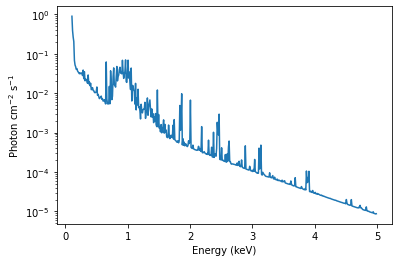

In [27]:
plt.plot((elo + ehi) / 2, y, '-')

plt.yscale('log')

plt.xlabel('Energy (keV)')
plt.ylabel('Photon cm$^{-2}$ s$^{-1}$');

We can see how this is absorbed:

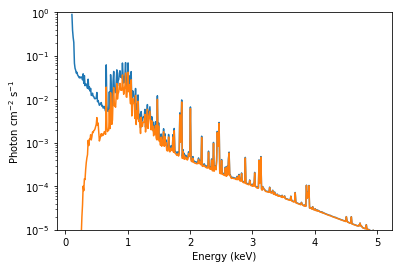

In [28]:
absorbed = gal * interesting
yabs = absorbed(elo, ehi)

plt.plot((elo + ehi) / 2, y, '-')
plt.plot((elo + ehi) / 2, yabs, '-')

plt.yscale('log')
plt.ylim(1e-5, 1)

plt.xlabel('Energy (keV)')
plt.ylabel('Photon cm$^{-2}$ s$^{-1}$');

Adding in the response will

- blur the model by the RMF
- correct the data by the ARF
- converting from a rate to counts (depending on the response)
- change the model so that the independent axis is channels, not energy

In [29]:
rsp = get_response()

convolved_interesting = rsp(interesting)
convolved_absorbed = rsp(absorbed)

This particular response includes both the ARF and RMF, and also includes the exposure time (so the output is in counts, not counts/bin):

In [30]:
print(convolved_interesting)

apply_rmf(apply_arf((50454.152030948 * xsapec.interesting)))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   interesting.kT thawed            1        0.008           64        keV
   interesting.Abundanc frozen            1            0            5           
   interesting.redshift frozen            0       -0.999           10           
   interesting.norm thawed            1            0        1e+24           


As mentioned, these models take in channel units, not energies$\ddagger$

---

$\ddagger$ actually this particular response already knows what channels to send in so you can just send in `[]` as an argument, but it's better to be explicit

In [31]:
y1 = convolved_interesting(pha.channel)

In [32]:
y2 = convolved_absorbed(pha.channel)

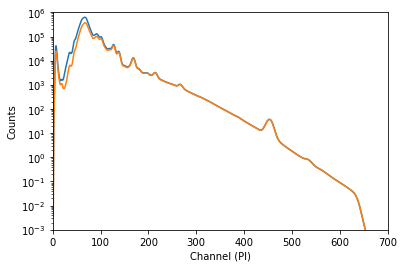

In [33]:
plt.plot(pha.channel, y1, '-')
plt.plot(pha.channel, y2, '-')

plt.yscale('log')
plt.xlim(0, 700)
plt.ylim(1e-3, 1e6)

plt.xlabel('Channel (PI)')
plt.ylabel('Counts');

You **can** group this data, and calculate the appropriate values for the X axis to label as energy or wavelentgh units, but that is out-of-scope of this notebook.

If you are interested in this then I suggest reading the [Sherpa ReadTheDocs documentation](https://sherpa.readthedocs.io/) - in particular [Handling PHA datasets](https://sherpa.readthedocs.io/en/latest/evaluation/examples.html#handling-pha-datasets) - rather than the [CIAO pages](https://cxc.cfa.harvard.edu/sherpa/).